In [1]:
# MARKET BASKET ANALYSIS FOR LOOKING AT ASSOCIATION RULES IN PYTHON

## BASED ON CODE FROM MOFFITT (2017) - Practical Business Python


import pandas as pd

# FOLLOWING PACKAGE BEST IMPORTED AND INSTALLED VIA CONDA PROMPT
# conda install -c conda-forge mlxtend

from mlxtend.frequent_patterns import apriori            # EASY ASSOCIATION RULES PACKAGE FROM RABST
from mlxtend.frequent_patterns import association_rules

import seaborn as sns  # PROVIDES TRELLIS AND SMALL MULTIPLE PLOTTING
import matplotlib.pyplot as plt  # 2D plotting


In [13]:
# OBTAIN data from UCI machine learning archive

df = pd.read_excel('http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
# SCRUB data with some minor transformations

df['Description'] = df['Description'].str.strip()
df.dropna(axis=0, subset=['InvoiceNo'], inplace=True)
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
df = df[~df['InvoiceNo'].str.contains('C')]

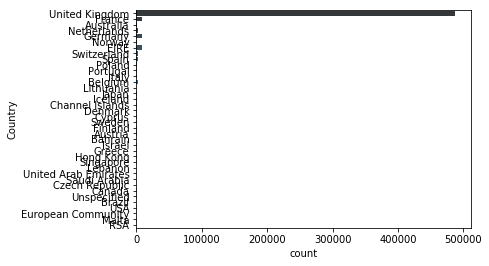

In [5]:
# EXPLORE data with some visuals

# BARPLOT SHOWING NUMBER ORDERS PER COUNTRY
sns.countplot(y="Country", data=df, palette="Blues_d")
plt.show()

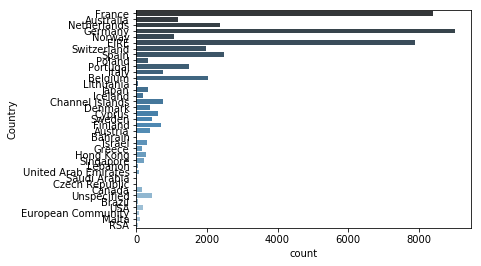

In [6]:
## BARPLOT MINUS UNITED KINGDOM
dfukless = df[df.Country != "United Kingdom"]
sns.countplot(y="Country", data=dfukless, palette="Blues_d")
plt.show()

In [7]:
## BREAKING OUT FOR JUST FRANCE

basket = (df[df['Country'] =="France"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

In [8]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)
basket_sets.drop('POSTAGE', inplace=True, axis=1)

In [9]:
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)

In [10]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

,antecedants,consequents,support,confidence,lift
0,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE GREEN),0.102041,0.725000,7.478947
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE PINK),0.096939,0.763158,7.478947
2,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.094388,0.837838,8.642959
3,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.096939,0.815789,8.642959
4,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE PINK),0.094388,0.783784,7.681081


In [11]:
rules[ (rules['lift'] >= 6) &
       (rules['confidence'] >= 0.8) ]

,antecedants,consequents,support,confidence,lift
2,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.094388,0.837838,8.642959
3,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.096939,0.815789,8.642959
17,(SET/6 RED SPOTTY PAPER PLATES),(SET/20 RED RETROSPOT PAPER NAPKINS),0.127551,0.800000,6.030769
18,(SET/6 RED SPOTTY PAPER CUPS),(SET/6 RED SPOTTY PAPER PLATES),0.137755,0.888889,6.968889
19,(SET/6 RED SPOTTY PAPER PLATES),(SET/6 RED SPOTTY PAPER CUPS),0.127551,0.960000,6.968889
20,"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...",(SET/6 RED SPOTTY PAPER PLATES),0.102041,0.975000,7.644000
21,"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...",(SET/6 RED SPOTTY PAPER CUPS),0.102041,0.975000,7.077778
22,"(SET/6 RED SPOTTY PAPER CUPS, SET/6 RED SPOTTY...",(SET/20 RED RETROSPOT PAPER NAPKINS),0.122449,0.812500,6.125000


In [12]:
## NOW LOOK AT GERMANY

basket2 = (df[df['Country'] =="Germany"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

basket_sets2 = basket2.applymap(encode_units)
basket_sets2.drop('POSTAGE', inplace=True, axis=1)
frequent_itemsets2 = apriori(basket_sets2, min_support=0.05, use_colnames=True)
rules4 = association_rules(frequent_itemsets2, metric="lift", min_threshold=1)

rules4[ (rules4['lift'] >= 4) &
        (rules4['confidence'] >= 0.5)]

,antecedants,consequents,support,confidence,lift
0,(PLASTERS IN TIN CIRCUS PARADE),(PLASTERS IN TIN WOODLAND ANIMALS),0.115974,0.584906,4.242887
6,(PLASTERS IN TIN SPACEBOY),(PLASTERS IN TIN WOODLAND ANIMALS),0.107221,0.571429,4.145125
11,(RED RETROSPOT CHARLOTTE BAG),(WOODLAND CHARLOTTE BAG),0.070022,0.843750,6.648168


In [ ]:
## NOW LOOK AT Portugal

basket2 = (df[df['Country'] =="Portugal"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

basket_sets2 = basket2.applymap(encode_units)
basket_sets2.drop('POSTAGE', inplace=True, axis=1)
frequent_itemsets2 = apriori(basket_sets2, min_support=0.05, use_colnames=True)
rules3 = association_rules(frequent_itemsets2, metric="lift", min_threshold=1)

rules3[ (rules3['lift'] >= 8) &
        (rules3['confidence'] >= 0.8)]
